In [2]:
from sklearn.datasets import make_blobs
import numpy as np


X, y = make_blobs(n_samples=30, centers=3, n_features=2)

import matplotlib.pyplot as plt


#plt.scatter(X[:,0], X[:,1], c=)
print(y)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(y.reshape(-1,1))
T = enc.transform(y.reshape(-1,1)).toarray()
T = np.array(T)

[0 2 2 0 1 0 2 2 2 1 2 1 2 1 2 0 0 2 1 1 2 0 1 1 0 0 0 1 0 1]


In [3]:
np.shape(np.array(T))

(30, 3)

In [5]:
import numpy as np
from numpy.linalg import inv

Xtilde = np.hstack((np.ones((np.shape(X)[0],1)), X))

XX = np.matmul(Xtilde.T, Xtilde)
XT = np.matmul(Xtilde.T, T)

Beta = np.matmul(inv(XX), XT)
print(Beta)

[[ 0.46983307  0.04162511  0.48854183]
 [-0.03908241 -0.03920576  0.07828817]
 [ 0.07301048 -0.08856858  0.0155581 ]]


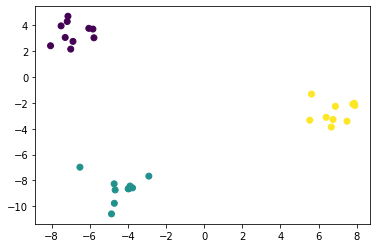

In [6]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

(3, 10000)


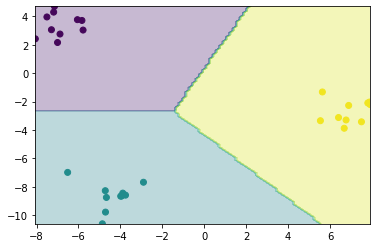

In [26]:
import numpy as np

x1min = np.min(X[:,0])
x1max = np.max(X[:,0])
x2min = np.min(X[:,1])
x2max = np.max(X[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))

Xpredict = np.vstack((xx1.flatten(), xx2.flatten())).T

XtildePredict = np.hstack((np.ones((np.shape(Xpredict)[0],1)), Xpredict))

prediction = np.matmul(Beta.T,XtildePredict.T) 
print(np.shape(prediction))

predictedTargets = np.zeros((len(xx1.flatten()), 1))

for i in range(len(xx1.flatten())):
    
    predictedTargets[i] = np.argmax(prediction[:,i])
    

    
    
plt.scatter(X[:,0], X[:,1], c = y)
plt.contourf(xx1, xx2, np.reshape(predictedTargets,np.shape(xx1)), alpha = .3)
plt.show()

In [42]:
# one vs one 

num_classes = max(y)+1


from __future__ import division



num_classifiers = int(num_classes*(num_classes-1)/2)

## generating the grid for the final display
x1min = np.min(X[:,0])
x1max = np.max(X[:,0])
x2min = np.min(X[:,1])
x2max = np.max(X[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))

Xpredict = np.vstack((xx1.flatten(), xx2.flatten())).T
Xtilde_predict = np.hstack((np.ones((np.shape(Xpredict)[0],1)), Xpredict))


PredictionMatrix = np.zeros((len(xx1.flatten()),num_classifiers))

counter = 0

for i in range(num_classes):
    
    for j in range(num_classes):
        
        if j> i:
        
            print('('+str(i)+str(j)+')')
            
            indices_i = np.squeeze(np.where(y==i))
            indices_j = np.squeeze(np.where(y==j))
            
            points_classi = Xtilde[indices_i,:]
            points_classj = Xtilde[indices_j,:]
            
            
            Xtilde_ij = np.vstack((points_classi, points_classj))
            
            target_i = np.ones((len(indices_i),1))
            target_j = np.zeros((len(indices_j),1))
            
            target_ij = np.vstack((target_i, target_j))
            
            # learning the plane
            
            XX = np.matmul(Xtilde_ij.T, Xtilde_ij)
            XT = np.matmul(Xtilde_ij.T, target_ij)

            beta_ij = np.matmul(inv(XX), XT)
            
            prediction_ij = np.matmul(Xtilde_predict, beta_ij)

            target_final_ij = np.zeros((len(prediction_ij),1))
            Test_indices_i = np.squeeze(np.where(prediction_ij>0.5))  
            target_final_ij[Test_indices_i] = i
            Test_indices_i = np.squeeze(np.where(prediction_ij<=0.5))  
            target_final_ij[Test_indices_j] = j
            
            PredictionMatrix[:,counter] = target_final_ij
        
        
            counter +=1
        

(01)


ValueError: could not broadcast input array from shape (10000,1) into shape (10000)

In [68]:
num_classes = max(y)+1


from __future__ import division

num_classifiers = int(num_classes*(num_classes-1)/2)

PredictionMatrix = np.zeros((len(xx1.flatten()),num_classifiers))


i=2
j =0

indices_i = np.squeeze(np.where(y==i))
indices_j = np.squeeze(np.where(y==j))

points_classi = Xtilde[indices_i,:]
points_classj = Xtilde[indices_j,:]
            
            
Xtilde_ij = np.vstack((points_classi, points_classj))

target_i = np.ones((len(indices_i),1))
target_j = np.zeros((len(indices_j),1))


            
target_ij = np.vstack((target_i, target_j))
            
# learning the plane

XX = np.matmul(Xtilde_ij.T, Xtilde_ij)
XT = np.matmul(Xtilde_ij.T, target_ij)

beta_ij = np.matmul(inv(XX), XT)

prediction_ij = np.matmul(XtildePredict, beta_ij)

target_final_ij = np.zeros((len(prediction_ij),1))
Test_indices_i = np.squeeze(np.where(prediction_ij>0))  
target_final_ij[Test_indices_i] = i
Test_indices_j = np.squeeze(np.where(prediction_ij<=0))  
target_final_ij[Test_indices_j] = j

PredictionMatrix[:,0] = np.squeeze(target_final_ij)



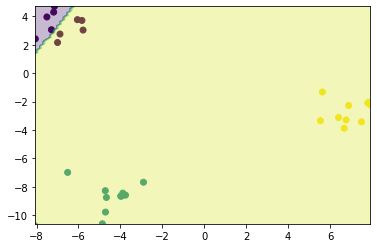

In [69]:
   
plt.scatter(X[:,0], X[:,1], c = y)
plt.contourf(xx1, xx2, np.reshape(target_final_ij,np.shape(xx1)), alpha = .3)
plt.show()

In [70]:
num_classes = max(y)+1


from __future__ import division

num_classifiers = int(num_classes*(num_classes-1)/2)

PredictionMatrix = np.zeros((len(xx1.flatten()),num_classifiers))


i=2
j =0

indices_i = np.squeeze(np.where(y==i))
indices_j = np.squeeze(np.where(y==j))

points_classi = Xtilde[indices_i,:]
points_classj = Xtilde[indices_j,:]
            
            
Xtilde_ij = np.vstack((points_classi, points_classj))

target_i = np.ones((len(indices_i),1))
target_j = -np.ones((len(indices_j),1))

            
target_ij = np.vstack((target_i, target_j))
            
# learning the plane

XX = np.matmul(Xtilde_ij.T, Xtilde_ij)
XT = np.matmul(Xtilde_ij.T, target_ij)

beta_ij = np.matmul(inv(XX), XT)

prediction_ij = np.matmul(XtildePredict, beta_ij)

target_final_ij = np.zeros((len(prediction_ij),1))
Test_indices_i = np.squeeze(np.where(prediction_ij>0))  
target_final_ij[Test_indices_i] = i
Test_indices_j = np.squeeze(np.where(prediction_ij<=0))  
target_final_ij[Test_indices_j] = j

PredictionMatrix[:,0] = np.squeeze(target_final_ij)



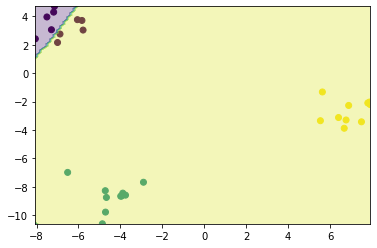

In [71]:

plt.scatter(X[:,0], X[:,1], c = y)
plt.contourf(xx1, xx2, np.reshape(target_final_ij,np.shape(xx1)), alpha = .3)
plt.show()

In [40]:
print(prediction_ij[:100])

[[0.37376381]
 [0.38313469]
 [0.39250557]
 [0.40187645]
 [0.41124733]
 [0.42061821]
 [0.42998909]
 [0.43935997]
 [0.44873085]
 [0.45810173]
 [0.46747262]
 [0.4768435 ]
 [0.48621438]
 [0.49558526]
 [0.50495614]
 [0.51432702]
 [0.5236979 ]
 [0.53306878]
 [0.54243966]
 [0.55181054]
 [0.56118142]
 [0.5705523 ]
 [0.57992318]
 [0.58929406]
 [0.59866494]
 [0.60803582]
 [0.6174067 ]
 [0.62677758]
 [0.63614846]
 [0.64551934]
 [0.65489022]
 [0.6642611 ]
 [0.67363198]
 [0.68300286]
 [0.69237374]
 [0.70174462]
 [0.7111155 ]
 [0.72048638]
 [0.72985726]
 [0.73922814]
 [0.74859902]
 [0.7579699 ]
 [0.76734078]
 [0.77671166]
 [0.78608254]
 [0.79545342]
 [0.8048243 ]
 [0.81419518]
 [0.82356606]
 [0.83293694]
 [0.84230783]
 [0.85167871]
 [0.86104959]
 [0.87042047]
 [0.87979135]
 [0.88916223]
 [0.89853311]
 [0.90790399]
 [0.91727487]
 [0.92664575]
 [0.93601663]
 [0.94538751]
 [0.95475839]
 [0.96412927]
 [0.97350015]
 [0.98287103]
 [0.99224191]
 [1.00161279]
 [1.01098367]
 [1.02035455]
 [1.02972543]
 [1.03

In [ ]:
# short demo 

points_class0 = [np.ones((10,1)), np.linspace()]





In [20]:
v = np.array([1,2,3,4])
indices = np.squeeze(np.where(v==1))
print(indices)

0


In [9]:
print('('+str(2))


(2
